In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

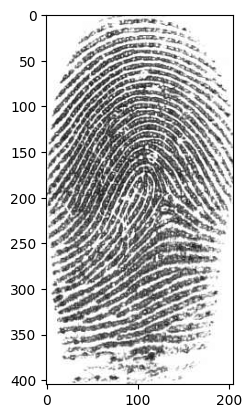

In [2]:
image = Image.open('images/fingerprint.png')

plt.imshow(image, cmap='gray')
plt.show()

In [3]:
se = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])

In [4]:
def erode(image, se):
    se_height, se_width = se.shape
    se_center_y, se_center_x = se_height // 2, se_width // 2
    image = np.array(image)
    output_image = np.full_like(image, 255)

    for y in range(se_center_y, image.shape[0] - se_center_y):
        for x in range(se_center_x, image.shape[1] - se_center_x):
            region = image[y - se_center_y: y + se_center_y + 1, x - se_center_x: x + se_center_x + 1]
            output_image[y, x] = np.min(region[se == 1])
    
    return output_image

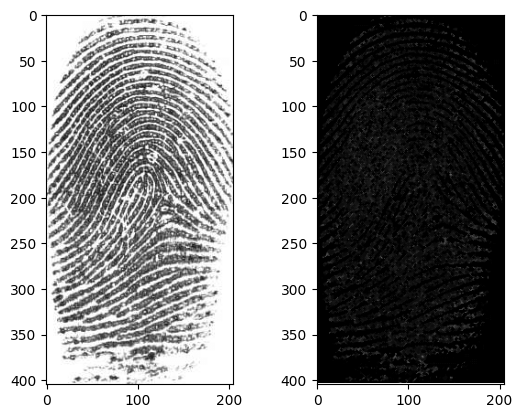

In [5]:
eroded_image = erode(image, se)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.show()

In [6]:
def dilate(image, se):
    se_height, se_width = se.shape
    se_center_y, se_center_x = se_height // 2, se_width // 2
    image = np.array(image)
    output_image = np.full_like(image, 255)

    for y in range(se_center_y, image.shape[0] - se_center_y):
        for x in range(se_center_y, image.shape[1] - se_center_x):
            region = image[y - se_center_y: y + se_center_y + 1, x - se_center_x: x + se_center_x + 1]
            output_image[y, x] = np.max(region[se == 1])
    
    return output_image

dilated_image = dilate(image, se)

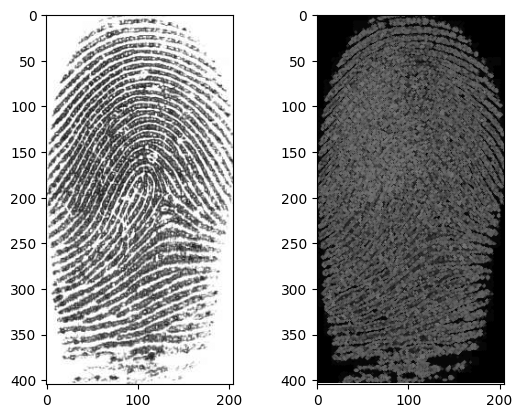

In [7]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.show()

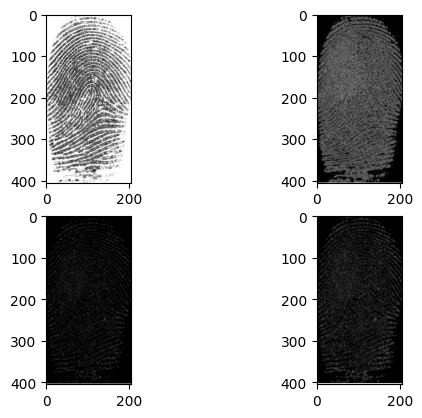

In [8]:
opened_image = dilate(erode(image, se), se)

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(eroded_image, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(opened_image, cmap='gray')
plt.show()

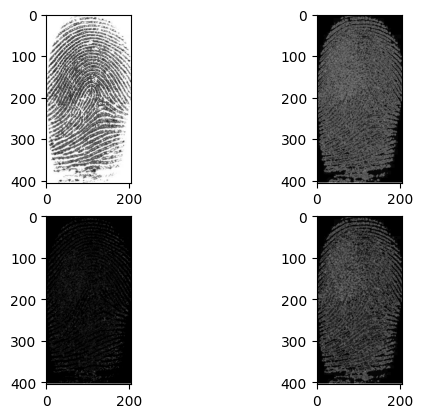

In [9]:
closed_image = erode(dilate(image, se), se)

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(eroded_image, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(closed_image, cmap='gray')
plt.show()

In [10]:
def hit_and_miss_transform(image, hit_se, miss_se):
    image = np.array(image)
    hit_result = erode(image, hit_se)
    miss_result = erode(255 - image, miss_se)
    return hit_result & miss_result
    
hit_se = np.array([[0, 0, 0], [0, 1, 0], [0, 1, 0]])
miss_se = np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]])

hit_and_miss_image = hit_and_miss_transform(image, hit_se, miss_se)

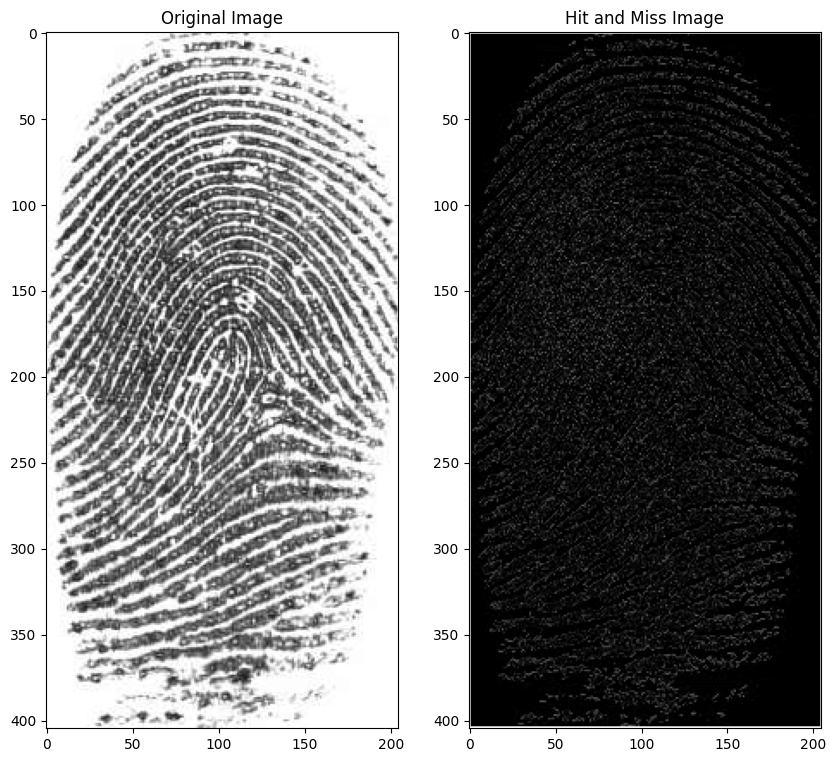

In [11]:
 plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Hit and Miss Image")
plt.imshow(hit_and_miss_image, cmap="gray")
plt.show()